In [392]:
import numpy as np
import pandas as pd
import matplotlib as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [393]:
#Note: Changes in Train must also be made on test dataset
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [394]:
print(train.shape)
print(test.shape)

(668, 11)
(223, 10)


In [395]:
train.head(2)
#Cabin is like train boggy number
#Embarked: S,C,Q- three city titanic was departing
#SibSp: Number of Sibling or Spouse
#Parch: Parent_Child


#Analysis:
#Which column I am 100% Sure won't affect much to our analysis?
#Till now I'm not sure

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.00,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.05,NaN,S,0


In [396]:
train.isnull().sum()
#Help to know missing Values in a column

#From here we can say Cabin is not useful for us...since lots of data is missing
#This data is have less than 60% values

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

In [397]:
#Same check for Test dataset
test.isnull().sum()

#same for train and test case so we will drop cabin

Pclass        0
Name          0
Sex           0
Age          45
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       173
Embarked      1
dtype: int64

In [398]:
train.drop(columns=["Cabin"],inplace=True)
test.drop(columns=["Cabin"],inplace=True)

In [399]:
train.head()
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.75,S


In [400]:
#Embarked and Age have few missing column, How should I fill it?
train["Embarked"].value_counts()

#S is more compare to C and Q so I will Fill it with S

S    484
C    133
Q     50
Name: Embarked, dtype: int64

In [401]:
train["Embarked"].fillna("S",inplace=True)
test["Embarked"].fillna("S",inplace=True)

In [402]:
train.isnull().sum()
test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         45
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
dtype: int64

In [403]:
# test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [404]:
train.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
Survived      0
dtype: int64

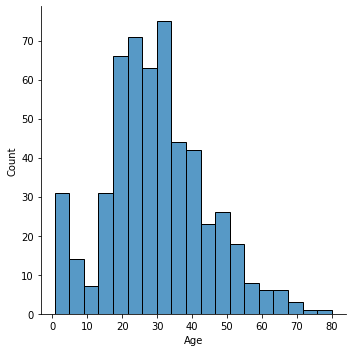

In [405]:
#One approach, Either replace it by Mean of Classes in which he/she is travelling
#Replace by mean based on Gendre 

# Since Age is Numerical data and continuous data we will make Histogram 
sns.displot(train["Age"])

#This Histogram shows it a normal Distribution so 68-95-99.75 rule is applicable

#So if i put age in between 1st std deviation age I will be 68% Accurate

In [406]:
#mean-1std_dev, mean+1std_dev
train_age=np.random.randint(train["Age"].mean()-train["Age"].std(),train["Age"].mean()+train["Age"].std(),132)

In [407]:
test_age=np.random.randint(test["Age"].mean()-test["Age"].std(),test["Age"].mean()+test["Age"].std(),45)

In [408]:
train["Age"][train["Age"].isnull()]=train_age

C:\Users\soniv\AppData\Local\Temp/ipykernel_55392/2756800988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Age"][train["Age"].isnull()]=train_age


In [409]:
train["Age"].isnull().sum()

0

In [410]:
test["Age"][test["Age"].isnull()]=test_age

C:\Users\soniv\AppData\Local\Temp/ipykernel_55392/2563268839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Age"][test["Age"].isnull()]=test_age


In [411]:
test["Age"].isnull().sum()

0

In [412]:
train.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Survived    0
dtype: int64

# Exploratory Data Analysis

In [413]:
train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,19.0,0,0,A/5 2466,8.0500,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
663,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,S,1
664,3,"Morrow, Mr. Thomas Rowan",male,22.0,0,0,372622,7.7500,Q,0
665,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,S,1
666,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,S,0


In [414]:
train[train["Pclass"]==1]["Survived"].value_counts()

1    105
0     56
Name: Survived, dtype: int64

In [415]:
train.groupby(["Pclass"])["Survived"].mean()
#mean help us to determine the percentage of survival in each class
#Analysis: From Pclass we can see survival depend on Pclass

Pclass
1    0.652174
2    0.486486
3    0.256267
Name: Survived, dtype: float64

In [416]:
train.groupby(["Sex"])["Survived"].mean()
#from Sex we can say survival rate is more for female compare to male

Sex
female    0.746888
male      0.208431
Name: Survived, dtype: float64

In [417]:
train.groupby(["Embarked"])["Survived"].mean()
#We can see survival rate of people departing for city C is more

Embarked
C    0.563910
Q    0.400000
S    0.358763
Name: Survived, dtype: float64

In [418]:
train.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Survived    0
dtype: int64

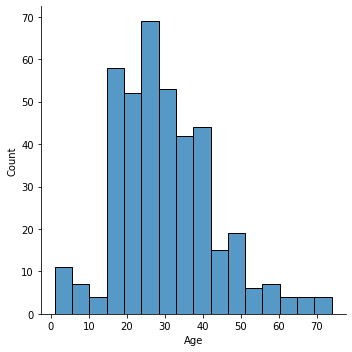

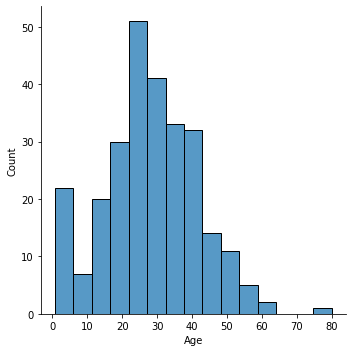

In [419]:
sns.displot(train["Age"][train["Survived"]==0])
sns.displot(train["Age"][train["Survived"]==1])

#Analysis: Children and Old people Survived more compare to Young age people

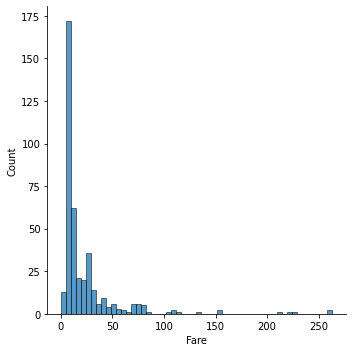

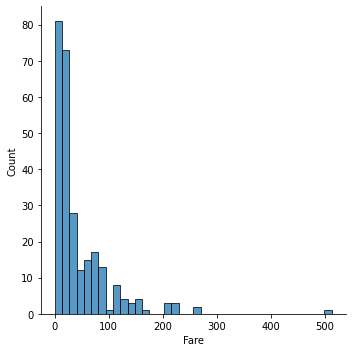

In [420]:
sns.displot(train["Fare"][train["Survived"]==0])
sns.displot(train["Fare"][train["Survived"]==1])

In [421]:
train.drop(columns=["Ticket"],inplace=True)
test.drop(columns=["Ticket"],inplace=True)

In [422]:
train["Family"]=train["SibSp"]+train["Parch"]

In [423]:
train["Family"]=train["Family"]+1

In [424]:
train.Family.value_counts()

1     392
2     123
3      84
4      20
6      17
5      13
7      11
11      5
8       3
Name: Family, dtype: int64

In [425]:
test["Family"]=test["SibSp"]+test["Parch"]+1

In [426]:
train.groupby(["Family"])["Survived"].mean()

Family
1     0.318878
2     0.560976
3     0.630952
4     0.700000
5     0.153846
6     0.117647
7     0.363636
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [427]:
def cal(num):
    if num==1:
        return "Alone"
    elif num>1 and num<5:
        return "Medium"
    else:
        return "Large"

In [428]:
train["Family_size"]=train["Family"].apply(cal)

In [429]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Family,Family_size
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,26.000,S,1,2,Medium
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,19.0,0,0,8.050,S,0,1,Alone
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,26.000,S,0,1,Alone
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.075,S,0,5,Large
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.050,S,0,1,Alone


In [430]:
test["Family_size"]=test["Family"].apply(cal)

In [431]:
train.drop(columns=["SibSp","Parch","Family"],inplace=True)
test.drop(columns=["SibSp","Parch","Family"],inplace=True)

In [432]:
train.drop(columns=["Name"],inplace=True)
test.drop(columns=["Name"],inplace=True)

In [433]:
train.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,Family_size
0,2,female,29.0,26.000,S,1,Medium
1,3,male,19.0,8.050,S,0,Alone
2,2,male,39.0,26.000,S,0,Alone
3,3,female,29.0,21.075,S,0,Large
4,3,male,25.0,7.050,S,0,Alone


In [434]:
#Label Encoding categories is converted into columns
#Sum of all categories columns is equal to 1
train=pd.get_dummies(train,columns=["Pclass","Sex","Embarked","Family_size"],drop_first=True)
# we have droped first category

In [435]:
train.shape

(668, 10)

In [436]:
test=pd.get_dummies(test,columns=["Pclass","Sex","Embarked","Family_size"],drop_first=True)


In [437]:
test.shape

(223, 9)

In [438]:
train["Survived_1"]=train["Survived"]

In [439]:
train.drop(columns=["Survived"],inplace=True)

In [448]:
train

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Medium,Survived_1
0,29.0,26.0000,1,0,0,0,1,0,1,1
1,19.0,8.0500,0,1,1,0,1,0,0,0
2,39.0,26.0000,1,0,1,0,1,0,0,0
3,29.0,21.0750,0,1,0,0,1,1,0,0
4,25.0,7.0500,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
663,17.0,10.5000,1,0,0,0,1,0,0,1
664,22.0,7.7500,0,1,1,1,0,0,0,0
665,32.0,56.4958,0,1,1,0,1,0,0,1
666,22.0,9.8375,0,1,0,0,1,0,0,0


In [449]:
X=train.iloc[:,:-1].values
df=pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8
0,29.0,26.0000,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,19.0,8.0500,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,39.0,26.0000,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,29.0,21.0750,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,25.0,7.0500,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
663,17.0,10.5000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
664,22.0,7.7500,0.0,1.0,1.0,1.0,0.0,0.0,0.0
665,32.0,56.4958,0.0,1.0,1.0,0.0,1.0,0.0,0.0
666,22.0,9.8375,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [441]:
# train["Age"]=train["Age"]/80

In [442]:
# test["Age"].max()

In [443]:
# test["Age"]=test["Age"]/71

In [451]:
Y=train.iloc[:,-1].values

,0
0,1
1,0
2,0
3,0
4,0
...,...
663,1
664,0
665,1
666,0


In [452]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [453]:

clf=LogisticRegression(n_jobs=-1, solver="saga", max_iter=20000, C=10, tol=0.000001, class_weight="balanced")
clf.fit(X_train,Y_train)

c:\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, class_weight='balanced', max_iter=20000, n_jobs=-1,
                   solver='saga', tol=1e-06)

In [225]:
# from sklearn.tree import DecisionTreeClassifier
# clf=DecisionTreeClassifier()

In [455]:
clf.score(X_test,Y_test)

0.8134328358208955

In [456]:
clf

LogisticRegression(C=10, class_weight='balanced', max_iter=20000, n_jobs=-1,
                   solver='saga', tol=1e-06)

In [469]:
predict=clf.predict(X_test)
predict

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [465]:
from sklearn.metrics import confusion_matrix

In [466]:
pd.DataFrame(confusion_matrix(Y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])


,Predicted No,Predicted Yes
Actual No,76,14
Actual Yes,11,33


In [467]:
from sklearn.metrics import classification_report


In [468]:
print(classification_report(Y_test,predict))


              precision    recall  f1-score   support

           0       0.87      0.84      0.86        90
           1       0.70      0.75      0.73        44

    accuracy                           0.81       134
   macro avg       0.79      0.80      0.79       134
weighted avg       0.82      0.81      0.81       134



In [470]:
ans=np.array(predict)
np.savetxt(X=ans,fname='data.csv', delimiter=',', fmt='%.5f')